# CE597 - Mapping Projection and Geometric Geodesy

## Lab 04 - A nicer mapping: Taking care of convergence of meridian

*Kevan Tissue*  
*Geomatics Engineering*  
*Lyles School of Civil Engineering*  
*Purdue University*

________

## <span style="color:blue">*PART 1*<span>

To begin this assignment, we are asked to create two tables from the original 11 points on the globe that we used in Lab 01 and Lab 02. The first table should contain spherical coordinates in DMS format and the second table should contain cartesian coordinates in meter format.  Both tables should be expressed with millimeter accuracy.

**Importing the necessary packages**

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot figures inside the notebook
%matplotlib inline

**Formula for conversing to radians**

In [2]:
rad = math.pi/180

**Earth's Radius**  
*(Assuming that the Earth is sphere and the radius of the Earth is 6371 km)*

In [3]:
R = 6371000 # meters

## 1.1: Spherical Coordinates (DMS format)

**Reading in the *pickle* file**

In [4]:
sph_dms = pd.read_pickle("./sph_dms.pkl")

**Printing the Spherical Coordinates in DMS**

In [5]:
print("The Original 11 Locations in Spherical Coordinates (DMS)")
print()
print("----------------------------------------------------------------------------------------")
print("                  Name     \u03BB(deg) \u03BB(min)   \u03BB(sec)   \u03C8(deg) \u03C8(min)   \u03C8(sec)       h(m)")
print("----------------------------------------------------------------------------------------")
for index, row in sph_dms.iterrows():
    print("%25s %5d %5d %11.5f %7d %5d %11.5f %11.3f" % (row['Name'], row['$\lambda$dd'], 
                                                     row['$\lambda$mm'], row['$\lambda$ss.sssss'],
                                                     row['$\psi$dd'], row['$\psi$mm'], 
                                                     row['$\psi$ss.sssss'], row['$h$ (m)']))
print("----------------------------------------------------------------------------------------")

The Original 11 Locations in Spherical Coordinates (DMS)

----------------------------------------------------------------------------------------
                  Name     λ(deg) λ(min)   λ(sec)   ψ(deg) ψ(min)   ψ(sec)       h(m)
----------------------------------------------------------------------------------------
          North Pole (NP)     0     0     0.00000      90     0     0.00000   -4261.104
          South Pole (NP)     0     0     0.00000     -90     0    -0.00000    2834.945
        New Orleans (PoB)   -89   -57   -12.38369      30     2    36.78024       0.000
         Eiffel Tower (1)     2    17    40.20111      48    51    29.64298      34.442
           Angkor Wat (2)   103    52     0.43521      13    24    45.08764      64.922
               Denali (3)  -151     0   -26.64532      63     4    10.20103    6189.878
      Purdue Fountain (4)   -86   -54   -49.61418      40    25    43.10224     189.890
  Cradle of Humankind (5)    27    46     2.57003     -25   -5

## 1.2: Earth-fixed Geocentric Cartesian Coordinates

In [6]:
xyz = pd.read_pickle("./cartesian.pkl")

**Printing the Earth-fixed Geocentric Cartesian Coordinates**

In [7]:
print('The Original 11 Locations in Earth-fixed Geocentric Cartesian Coordinates')
print()
print("--------------------------------------------------------------------------")
print("                 Name              X(m)             Y(m)            Z(m)")
print("--------------------------------------------------------------------------")
for index, row in xyz.iterrows():
    print("%25s %15.3f %15.3f %15.3f" % (row['Name'], row['$X$(m)'], row['$Y$(m)'], row['$Z$(m)']))
print("--------------------------------------------------------------------------")

The Original 11 Locations in Earth-fixed Geocentric Cartesian Coordinates

--------------------------------------------------------------------------
                 Name              X(m)             Y(m)            Z(m)
--------------------------------------------------------------------------
          North Pole (NP)           0.000           0.000     6366738.896
          South Pole (NP)           0.000           0.000    -6373834.945
        New Orleans (PoB)        4481.657    -5515023.160     3189692.848
         Eiffel Tower (1)     4188298.206      167816.761     4797924.086
           Angkor Wat (2)    -1485276.721     6016678.744     1477835.647
               Denali (3)    -2526335.374    -1399943.968     5685625.490
      Purdue Fountain (4)      261108.755    -4842806.547     4131719.689
  Cradle of Humankind (5)     5071215.074     2670059.803    -2786051.054
   Sydney Opera House (6)    -4636796.725     2547607.409    -3549578.019
             Rapa Nui (7)    -169559

______

## <span style="color:blue">*PART 2*<span>

In lab assignment 03, we were asked to plot the original 11 points, as well as the coastline and gridline files supplied by the professor, on a map using the Plate Caree Map Prescription. In this lab we are asked to repeat the process, except this time we should plot the data using a better map projection than the Plate Caree. We are asked to identify and implement a mapping prescription that takes care of convergence of meridian. In this case, we will be using the Sanson-Flamsteed Prescription.

**Function for converting DMS to Decimal Degrees**

In [8]:
def dms2dd(dd, mm, ss):
    """
    A function that will convert degree minute second (DMS) format into decimal degree format
    
    Inputs
    -----
    dd: spherical coordinate value: degrees (integer)
    mm:spherical coordinate value: minutes (integer)
    ss: spherical coordinate value: seconds (floating number)
    
    Output
    ------
    calculated decimal degree value (floating number)
    """
    return dd + mm/60 + ss/3600

**Initializing the Arrays**

In [9]:
lmd_dd = np.zeros(11, dtype = np.float64)
psi_dd = np.zeros(11, dtype = np.float64)

**Applying the Conversion from DMS to Decimal Degrees**

In [10]:
for index, row in sph_dms.iterrows():
    lmd_dd[index] = dms2dd(row['$\lambda$dd'], row['$\lambda$mm'], row['$\lambda$ss.sssss'])
    psi_dd[index] = dms2dd(row['$\psi$dd'], row['$\psi$mm'], row['$\psi$ss.sssss'])

**Reading in the coastline file**

In [11]:
coastline = pd.read_csv('coastline.dat', header=None, sep='\s\s+', engine='python', usecols=[1,2], names=["psi","lambda"])
coast_dd = coastline/60

**Reading in the gridline file**

In [12]:
gridline = pd.read_csv('gridline.dat', header=None, sep='\s\s+', engine='python', usecols=[1,2], names=["psi","lambda"])
grid_dd = gridline/60

## 2.1: Plotting the Map

**Sanson-Flamsteed Mapping Prescription**

In [13]:
Xm = lmd_dd * np.cos(psi_dd*rad)
Ym = psi_dd

# Plate Caree Coordinates
# Xm2 = lmd_dd
# Ym2 = psi_dd

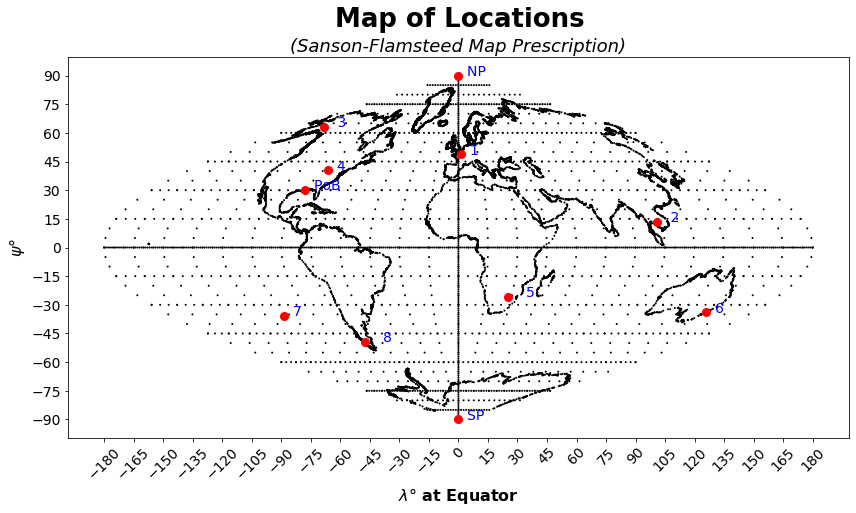

In [14]:
# Labels for markers
labels = ['  NP', '  SP', '  PoB', '  1', '   2', '   3', '  4', '    5', '  6', '  7', '    8']

# Resizing the plot window
plt.rcParams["figure.figsize"] = (14,7)

# Plotting the original locations
plt.plot(Xm, Ym, 'ro', markersize=8, zorder=5) # SF

# Checking the changes from Plate Caree to Sanson-Flamsteed
# plt.plot(Xm2, Ym2, 'bo', markersize=8, zorder=4) # PC
# for i in range(0, 11, 1):
#     plt.plot([Xm2[i],Xm[i]], [Ym2[i],Ym[i]], 'g-')

# Plotting the coastlines
plt.scatter(coast_dd['lambda']*np.cos(coast_dd['psi']*rad), coast_dd['psi'], c='k', s=4, edgecolors='none', zorder=2)

# Plotting the gridlines
plt.scatter(grid_dd['lambda']*np.cos(grid_dd['psi']*rad), grid_dd['psi'], c='k', s=4, edgecolors='none', zorder=3)

# Plot title & Axis labels
plt.xlabel('$\lambda °$ at Equator', fontsize='16', fontweight='bold')
plt.ylabel('$\psi °$', fontsize='16', fontweight='bold')
plt.suptitle('   Map of Locations', fontsize='26', fontweight='bold')
plt.title('(Sanson-Flamsteed Map Prescription)', fontsize='18', style='italic')

# Adding labels to the markers
for i, txt in enumerate(labels):
    plt.annotate(txt, (Xm[i], Ym[i]), fontsize='14', color='b')

# Tick Mark Labels
plt.xticks(np.arange(-180, 181, 15), fontsize='14', rotation=45)
plt.yticks(np.arange(-90, 91, 15), fontsize='14')

# Grid
plt.grid(True, color='white', zorder=1)

______

## <span style="color:blue">*PART 3*<span>

We are asked to select the 15 x 15 degree square of meridian and parallel circle that encloses our PoB, and call this square ABCD. My place of birth is New Orleans, Louisiana and the spherical coordinates are around -89 degrees longitude and just over 30 degrees latitude. When dividing the world into 15 x 15 degree squares, my PoB falls between -90 and -75 degrees longitude and between 30 and 45 degrees latitude.

Next, we are asked to determine the scale through a series of measurements and calculation. This scale will be the representative fraction of our map for the lines AB, AC, and AD. 

## 3.1: Plotting Place of Birth within the Square ABCD

**Checking Spherical Coordinates (decimal degrees) of PoB**

In [15]:
lmd_dd[2], psi_dd[2]

(-89.95343991388889, 30.04355006666667)

**Sanson_Flamsteed Mapping Prescription**

In [16]:
Xm_sqr = lmd_dd[2] * np.cos(psi_dd[2]*rad) # PoB
Ym_sqr = psi_dd[2] # PoB

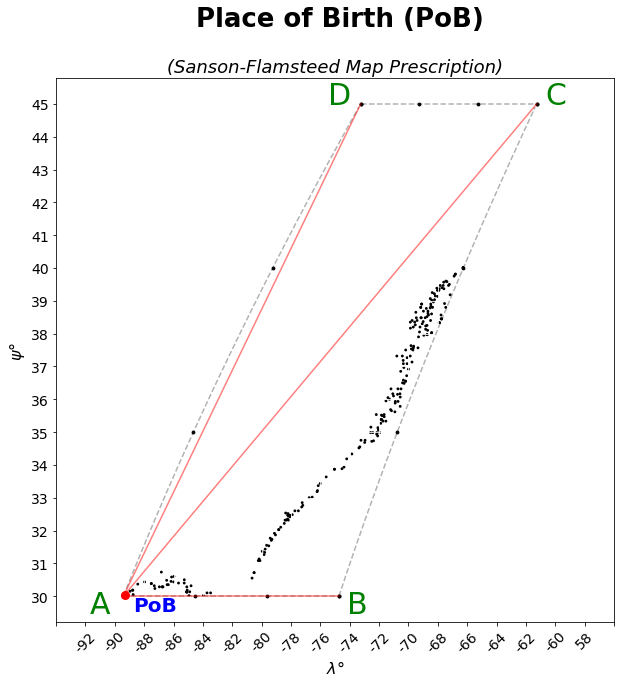

In [17]:
# Resizing the plot window
plt.rcParams["figure.figsize"] = (10,10)

# Plotting PoB
plt.plot(Xm_sqr, Ym_sqr, 'ro', markersize=8, zorder=4)

# Subsetting the coastlines to only include values within square ABCD
coast_sqr = coast_dd[(coast_dd['lambda'] >= -90) & (coast_dd['lambda'] < -75) &
                       (coast_dd['psi'] >= 30) & (coast_dd['psi'] < 46)]
# Plotting the coastlines
plt.scatter(coast_sqr['lambda']*np.cos(coast_sqr['psi']*rad), coast_sqr['psi'], c='k', s=8, edgecolors='none', zorder=1)

# Subsetting the gridlines to only include values within square ABCD
grid_sqr = grid_dd[(grid_dd['lambda'] >= -90) & (grid_dd['lambda'] < -74) &
                       (grid_dd['psi'] >= 30) & (grid_dd['psi'] < 46)]
# Plotting the gridlines
plt.scatter(grid_sqr['lambda']*np.cos(grid_sqr['psi']*rad), grid_sqr['psi'], c='k', s=8, edgecolors='k', zorder=2)

# Plot title & Axis labels
plt.xlabel('$\lambda °$', fontsize='16', fontweight='bold')
plt.ylabel('$\psi °$', fontsize='16', fontweight='bold')
plt.suptitle('   Place of Birth (PoB)', fontsize='26', fontweight='bold')
plt.title('(Sanson-Flamsteed Map Prescription)', fontsize='18', style='italic')

# Extents
xA = -90
yA = 30
xB = -75
yB = 30
xC = -75
yC = 45
xD = -90
yD = 45

# Applying Sanson-Flamsteed transformation to extents
xA2 = xA * np.cos(yA*rad)
xB2 = xB * np.cos(yB*rad)
xC2 = xC * np.cos(yC*rad)
xD2 = xD * np.cos(yD*rad)

# Defining arrays for plotting gridlines
xAB = np.arange(-90,-75,0.1)
yAB = np.array([30] * 150)
xBC = np.array([-75] * 150)
yBC = np.arange(30,45,0.1)
xCD = np.arange(-90,-75,0.1)
yCD = np.array([45] * 150)
xDA = np.array([-90] * 150)
yDA = np.arange(30,45,0.1)
xAC = np.arange(-90,-75,0.1)
yAC = np.arange(30,45,0.1)

# Applying Sanson-Flamsteed transformation to gridlines
xAB2 = xAB * np.cos(yAB*rad)
xBC2 = xBC * np.cos(yBC*rad)
xCD2 = xCD * np.cos(yCD*rad)
xDA2 = xDA * np.cos(yDA*rad)
xAC2 = xAC * np.cos(yAC*rad)

# Plotting gridlines
plt.plot(xAB2,yAB,'k--', alpha=0.3)
plt.plot(xBC2,yBC,'k--', alpha=0.3)
plt.plot(xCD2,yCD,'k--', alpha=0.3)
plt.plot(xDA2,yDA,'k--', alpha=0.3)

# Plotting Distance Lines
plt.plot([xD2,xA2],[yD,yA],'r-', alpha=0.5)
plt.plot([xB2,xA2],[yB,yA],'r-', alpha=0.5)
plt.plot([xC2,xA2],[yC,yA],'r-', alpha=0.5)

# Labels
plt.text(Xm_sqr+0.5, Ym_sqr-0.5, 'PoB', fontsize=20, fontweight='bold', color='b')
plt.text(xA2-2, yA-0.5, 'A', fontsize=30, color='g')
plt.text(xB2+0.5, yB-0.5, 'B', fontsize=30, color='g')
plt.text(xC2+0.5, yC, 'C', fontsize=30, color='g')
plt.text(xD2-2, yD, 'D', fontsize=30, color='g')

# Tick Mark Labels
plt.yticks(np.arange(30, 46, 1), fontsize='14')
plt.xticks((np.arange(int(xA2)-5, int(xC2)+5,1.77)), ('','-92','-90','-88','-86','-84','-82','-80',
                                                      '-78','-76','-74','-72','-70','-68','-66','-64',
                                                      '-62','-60','58',''), color='k', fontsize='14', rotation=45)

# Grid
plt.grid(True, color='white', zorder=3)

## 3.2: Measurements & Calculations

**Real World (RW)**

In [18]:
lamA = -90 * rad
psiA = 30 * rad
lamB = -75 * rad
psiB = 30 * rad
lamC = -75 * rad
psiC = 45 * rad
lamD = -90 * rad
psiD = 45 * rad

**RW distances *(in meters)***

In [19]:
ds_AB = R * np.cos(psiA) * (lamB - lamA)
ds_AC = R * np.arccos((np.sin(psiA)*np.sin(psiC)) + (np.cos(psiA)*np.cos(psiC)*np.cos(lamC - lamA)))
ds_AD = R * (psiD - psiA)

**Mapping World (MW)**

In [20]:
xA = -90 * np.cos(30 * rad)
yA = 30
xB = -75 * np.cos(30 * rad)
yB = 30
xC = -75 * np.cos(45 * rad)
yC = 45
xD = -90 * np.cos(45 * rad)
yD = 45

**MW distances *(in centimeters)***

In [21]:
dS_AB = math.sqrt((xB - xA)**2 + (yB - yA)**2)
dS_AC = math.sqrt((xC - xA)**2 + (yC - yA)**2)
dS_AD = math.sqrt((xD - xA)**2 + (yD - yA)**2)

**Scale**

In [22]:
sigma_AB = ds_AB / ((dS_AB/100))
sigma_AC = ds_AC / ((dS_AC/100))
sigma_AD = ds_AD / ((dS_AD/100))

**Setting up a data frame**

In [23]:
line = ('AB','AC','AD')
RW = (ds_AB, ds_AC, ds_AD)
MW = (dS_AB, dS_AC, dS_AD)
sig_ratio = ('1:' + str(int(sigma_AB)), '1:' + str(int(sigma_AC)), '1:' + str(int(sigma_AD)))

scale = pd.DataFrame({
    'Line':line, 
    'RW (m)':RW, 
    'MW (cm)':MW, 
    'Scale':sig_ratio
})

**Displaying Scale in Table**

In [24]:
print('Scale')
print()
print("-------------------------------------------------------------")
print("  Line        RW dist(m)      MW dist(cm)           Scale")
print("-------------------------------------------------------------")
for index, row in scale.iterrows():
    print("%5s %18.3f %13.3f %20s" % (row['Line'], row['RW (m)'], row['MW (cm)'], row['Scale']))
print("-------------------------------------------------------------")

Scale

-------------------------------------------------------------
  Line        RW dist(m)      MW dist(cm)           Scale
-------------------------------------------------------------
   AB        1444464.469        12.990           1:11119492
   AC        2121664.172        29.077            1:7296708
   AD        1667923.900        20.726            1:8047500
-------------------------------------------------------------


______

## <span style="color:blue">*PART 4*<span>

## 4.1: Conclusion

We were asked to implement a mapping prescription that would take care of convergence of meridian and it's evident from the plots and calculations above that the Sanson-Flamsteed prescription accomplishes this. Unfortunately, this causes the meridian lines to curve towards the poles, meaning that unless you are located at the prime meridian, the scale is changing as you travel along the meridians. This makes it difficult to calculate distances traveled in the north-south direction. The parallel circles, however, maintain the same scale relative to the latitude at which they are located. 

I think it's interesting to note that the scale of line AB in Lab 04 is identical to the scale of line AD in Lab 03. Although both lines AB and AD are technically 15°, the Real World distances are quite different. In the Mapping World, the distances are also different due to Lab 03 using the Plate Caree prescription and Lab 04 using the Sanson-Flamsteed prescription. In one hand, it seems logical to think that the reason for their likeness is due to the nature of their respective mapping prescriptions, but at the same time, it does not seem logical that they should actually be identical. 

When comparing this map with the map from Lab 03, neither map is unanimously better than the other. In contrast to Lab 03, the scales in Lab 04 get larger as you move away from the equator. Similar to Lab 03, however, whether or not this is an issue for you depends on where in the map you are locate. Both scales have advantages and disadvantages over the other, so ultimately, it comes down to what exactly is being mapped. With areas near the equator or prime meridian, the Sanson-Flamsteed is a better prescription, but for areas closer to the poles, the Plate Caree prescription seems to be a little better.  At the end of the day, though, both mapping prescriptions fall short of the mark. 

I like that the Sanson-Flamsteed mapping prescription gives the illusion of 3 dimensions even though it is a 2D map. I don't like how this prescription treats the areas near the poles though. If you're dealing with latitudes above 60° or below -60°, you definitely need to used a different mapping prescription.